In [6]:
import os 
path = os.getcwd() + '/loan.csv'


In [7]:
import numpy as np
import pandas as pd

df= pd.read_csv(path, sep=",",low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
#finding the percentage of missing value in each column
round(df.isnull().sum()/len(df.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [9]:
#removing colmns which hve more than 60% of missing values
df = df.drop( df.columns[100*(df.isnull().sum()/len(df.index)) > 60], axis=1)
print(df.shape)

(39717, 54)


In [10]:
#removing column description as it contains the comment which is of no use for our analysis
df = df.drop(['desc'], axis=1)

In [11]:
len(df[df.isnull().sum(axis=1) > 5].index)

0

i.e no row contains the value which have more than 5 missing values which is approx. 1/10th of total columns selected for our analysis


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [13]:
#converting emp_length and int_rate in numeric type 
df = df[~df['emp_length'].isnull()]
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null object
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pla

In [14]:
df['int_rate'] = df['int_rate'].apply(lambda x: x.rstrip("%"))
df['int_rate'] = df['int_rate'].apply(lambda x : float(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

## Data Analysis

For analysis ther are three types of variables 
1.Related to applicant(age, occupation, employment details ,etc)
2.loan characteristics (amount of loan, interest rate, etc.) 
3.behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next   payment date etc.)

In [15]:
behaviour_var =  [ "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util",
                  "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp",
                  "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d",
                  "last_pymnt_amnt", "last_credit_pull_d", "application_type"]

These behavioral variables are of no use during analysis as they are not known at time of application.

In [16]:
#removing these behavioural variables 

df = df.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [17]:
#Also removing variables like title,url,zip and address as they are not of any substantial use 

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

There are three types of results 1. fully paid, 2.current, 3.charged off. Nothing can be said about the current loans as we dont know whether the customer will pay of charge them off , therefore we remove the current loans

In [18]:
df = df[df['loan_status']!='Current']


In [19]:
#Finding the no of remaining loans

df['loan_status'].value_counts()


Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

Converting loan status to 0 or 1 for better analysis 
0 for "Fully Paid"
1 for "Charged off"

In [20]:
df["loan_status"] = df['loan_status'].apply(lambda x : 0 if x=='Fully Paid' else 1)
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

In [21]:
df['loan_status'].value_counts()


0    32145
1     5399
Name: loan_status, dtype: int64

## Univariate Analysis

Now lets start analyzing the variables 

In [22]:
#calculatin the default %
round(np.mean(df['loan_status']),2)

0.14

Now let us see the default w.r.t. each variable 

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns 



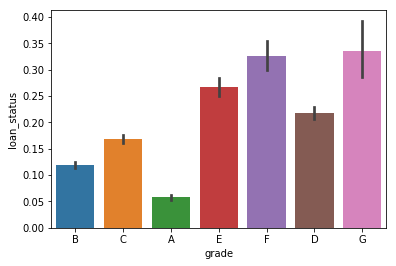

In [24]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

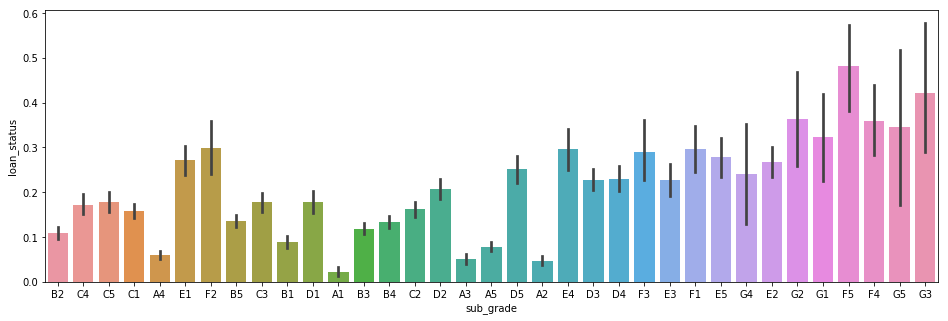

In [25]:
#default rates across sub grades
plt.figure(figsize=(16, 5))
sns.barplot(x='sub_grade', y='loan_status', data=df)
plt.show()

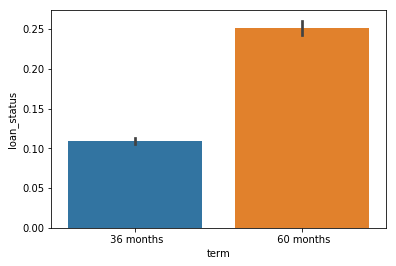

In [26]:
#Across term
sns.barplot(x='term', y='loan_status', data=df)
plt.show()

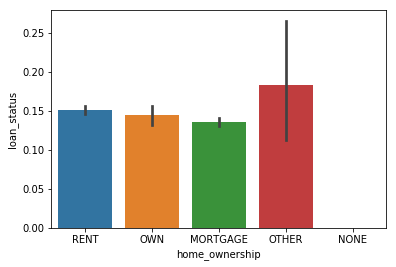

In [27]:
#Across Home ownership
sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.show()

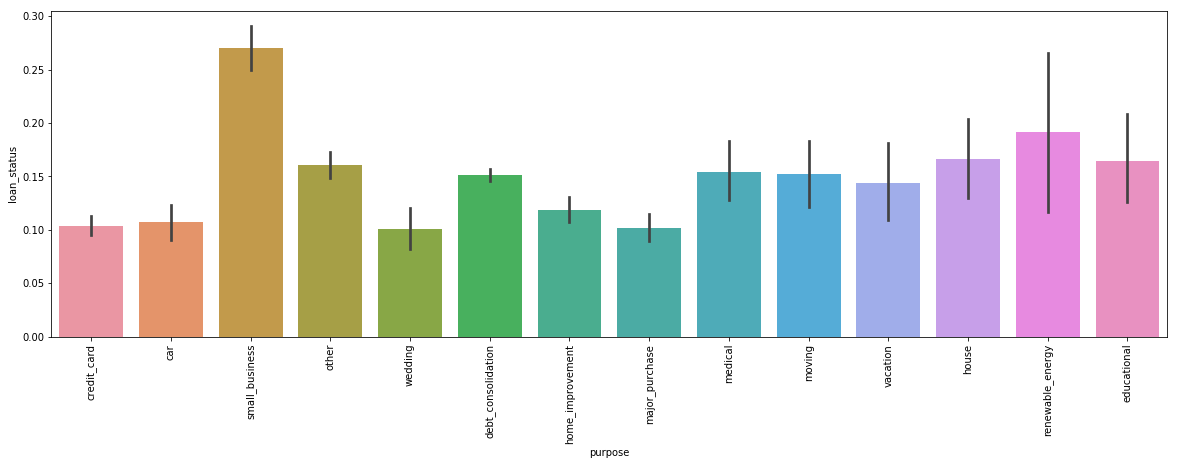

In [48]:
#Across purpose
plt.figure(figsize=(20,6))
sns.barplot(x='purpose', y='loan_status', data=df)
plt.xticks(rotation = 90)
plt.show()

For Continious Variables , the best way to analyze them is by binning them into different ranges like low, medium , high , very high etc.

In [29]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 10000:
        return 'medium'
    elif n >= 10000 and n < 20000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

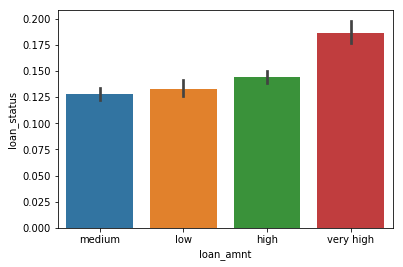

In [30]:
#default rates w.rt. ammounts of loan taken
sns.barplot(x='loan_amnt', y='loan_status', data=df)
plt.show()

In [31]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

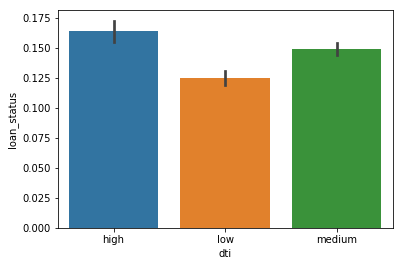

In [32]:
#According to the debt to income ratio
sns.barplot(x='dti', y='loan_status', data=df)
plt.show()

In [33]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

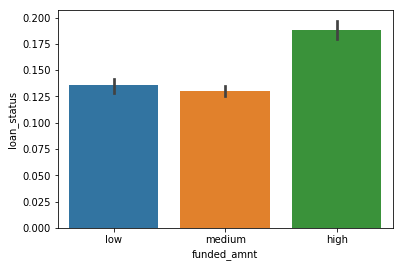

In [34]:
#According to funded ammount
sns.barplot(x='funded_amnt', y='loan_status', data=df)
plt.show()

In [35]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

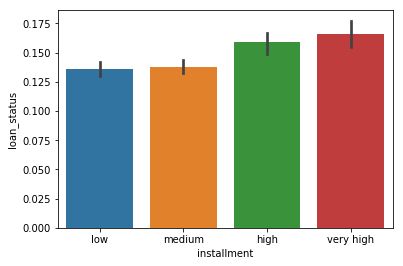

In [36]:
#according to installment ammount
sns.barplot(x='installment', y='loan_status', data=df)
plt.show()

In [37]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

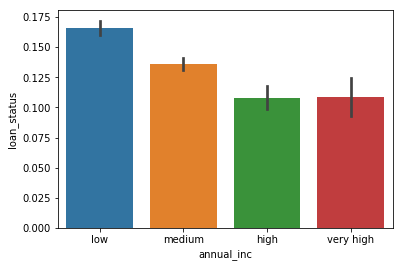

In [38]:
#According to annual income
sns.barplot(x='annual_inc', y='loan_status', data=df)
plt.show()

In [39]:
#accoring to length of employment
df = df[~df['emp_length'].isnull()]

def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=6:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

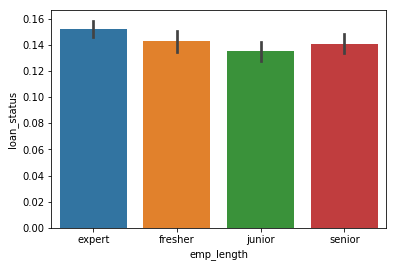

In [40]:
sns.barplot(x='emp_length', y='loan_status', data=df)
plt.show()

In [41]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

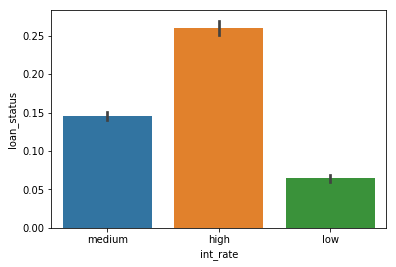

In [42]:
sns.barplot(x='int_rate', y='loan_status', data=df)
plt.show()

## Segmented Univariate Analysis

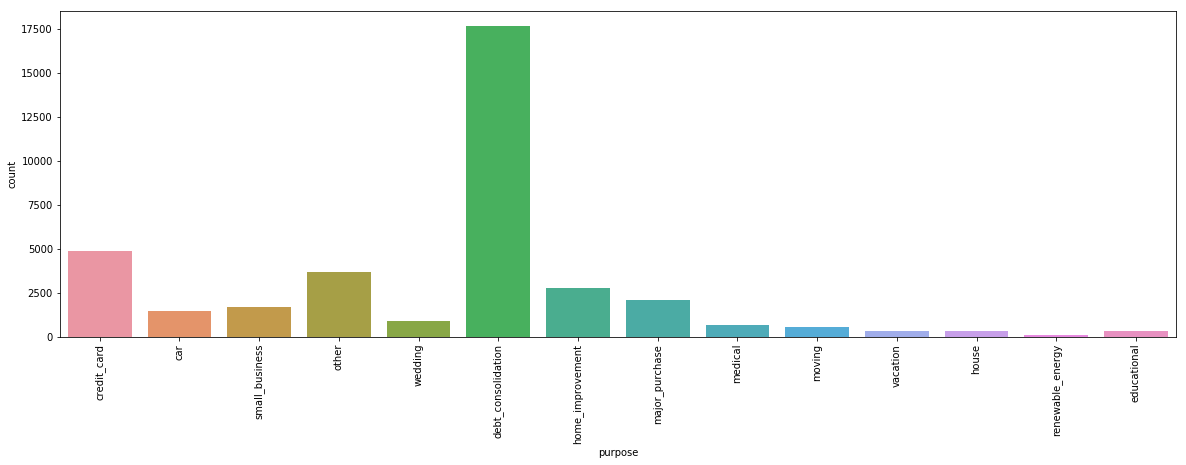

In [47]:
#looking at the count of various purpose for which loan is taken

plt.figure(figsize=(20,6))
sns.countplot(x='purpose', data=df)
plt.xticks(rotation = 90)
plt.show()

Analysing top five loans based on purpose:

In [49]:
top_purpose = ["credit_card","debt_consolidation","home_improvement","major_purchase","small_business"]
df = df[df['purpose'].isin(top_purpose)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
small_business         1710
Name: purpose, dtype: int64

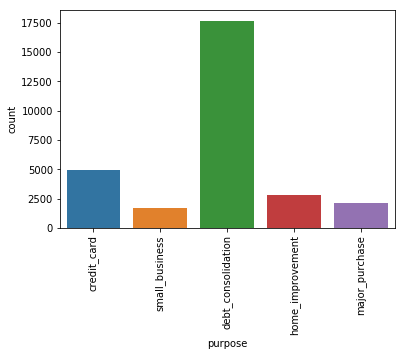

In [51]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.xticks(rotation = 90)
plt.show()

In [64]:
# comparison across two types of categorical variables

def plot_segmented(variable):
    plt.figure(figsize=(15,8))
    sns.barplot(x=variable, y='loan_status', hue='purpose', data=df)
    plt.show()

    


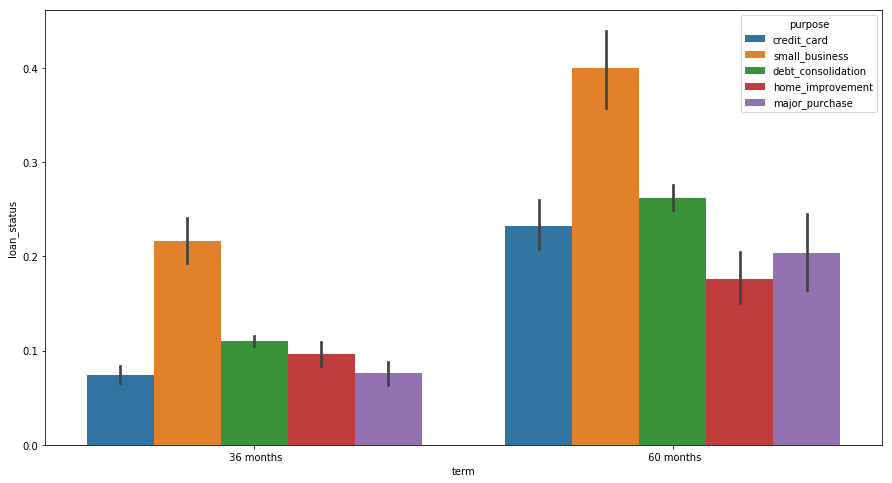

In [65]:
plot_segmented('term')

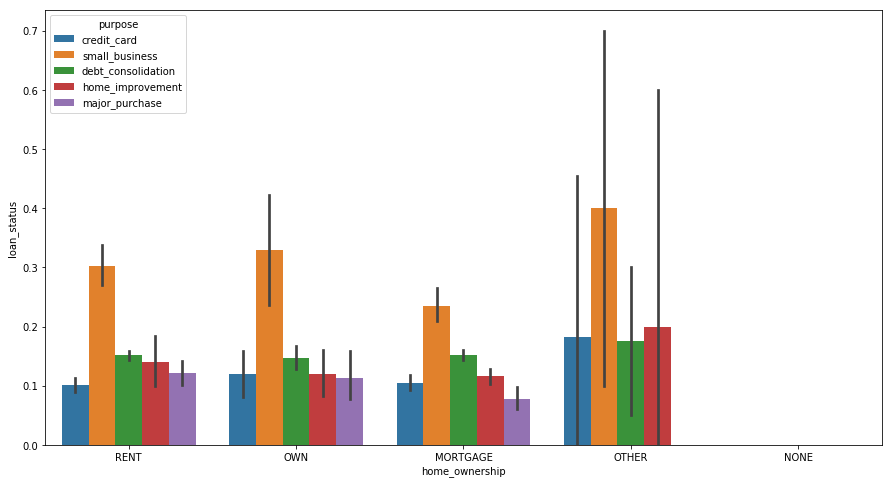

In [66]:
plot_segmented('home_ownership')

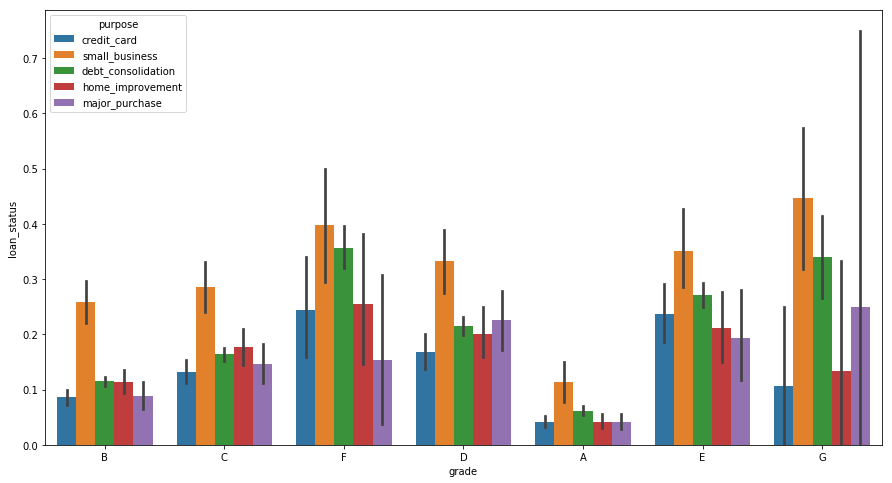

In [67]:
plot_segmented('grade')

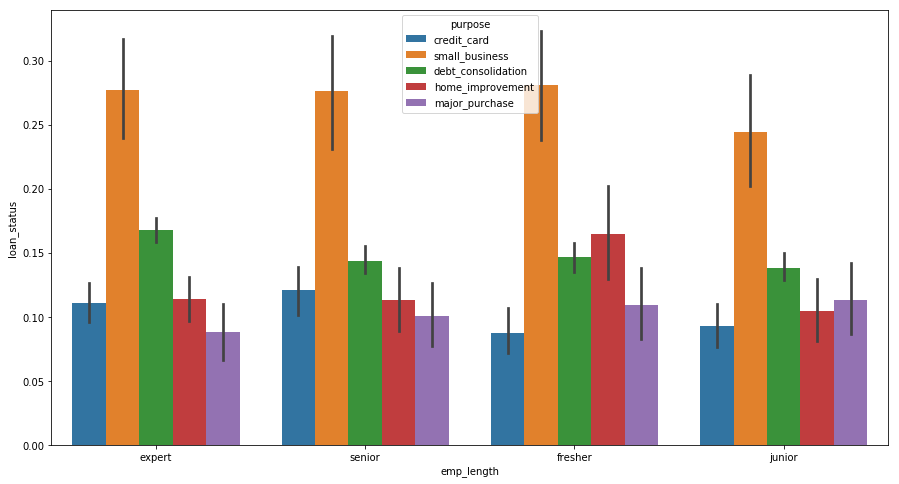

In [69]:
plot_segmented('emp_length')

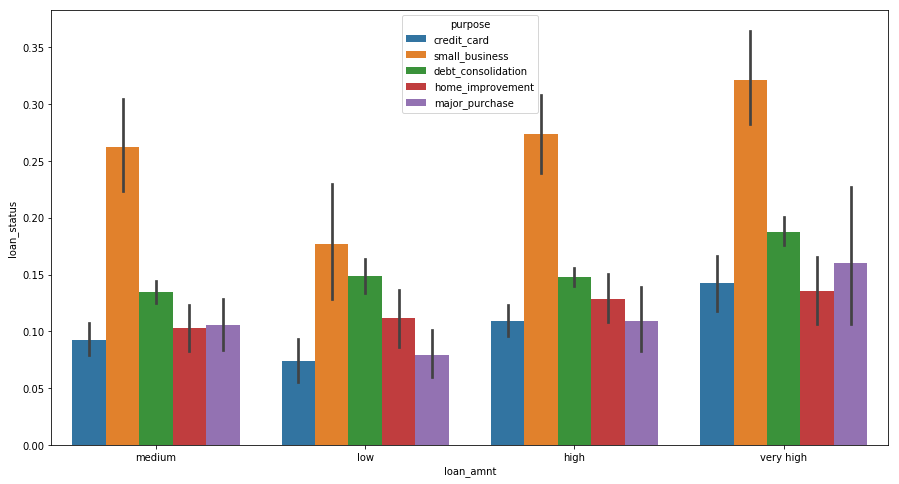

In [70]:
plot_segmented('loan_amnt')

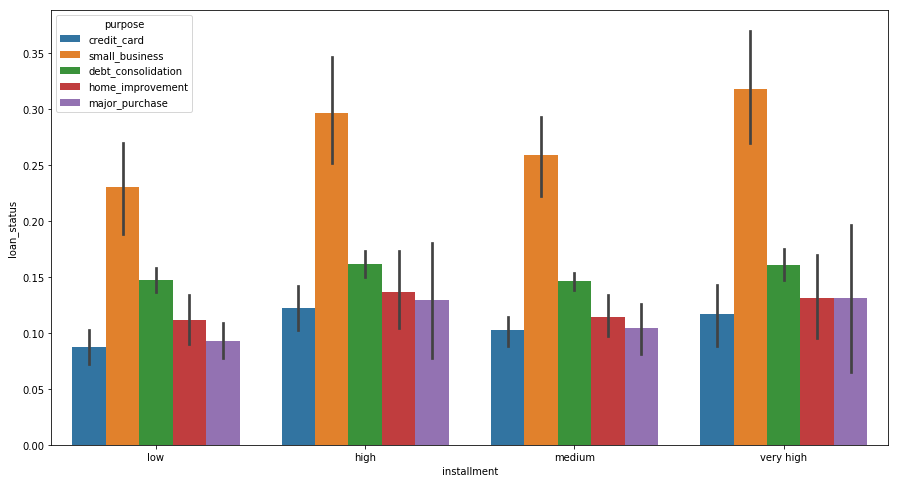

In [71]:
plot_segmented('installment')

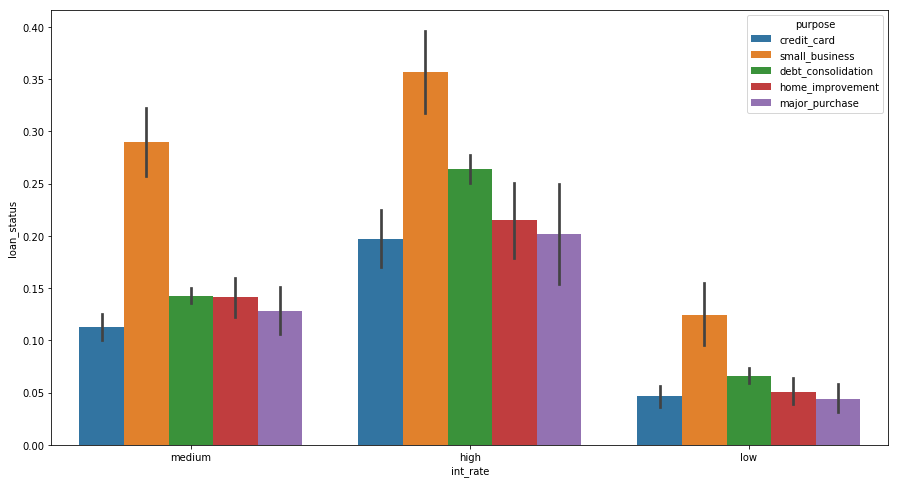

In [72]:
plot_segmented('int_rate')

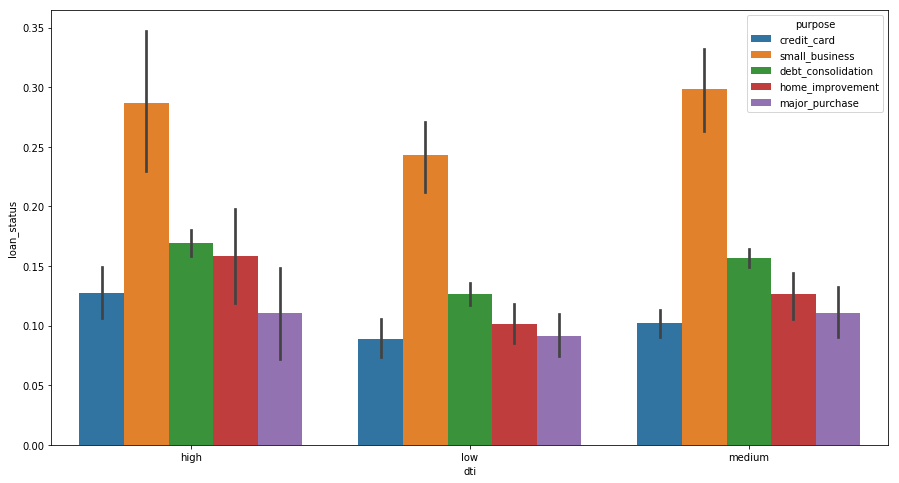

In [73]:
plot_segmented('dti')

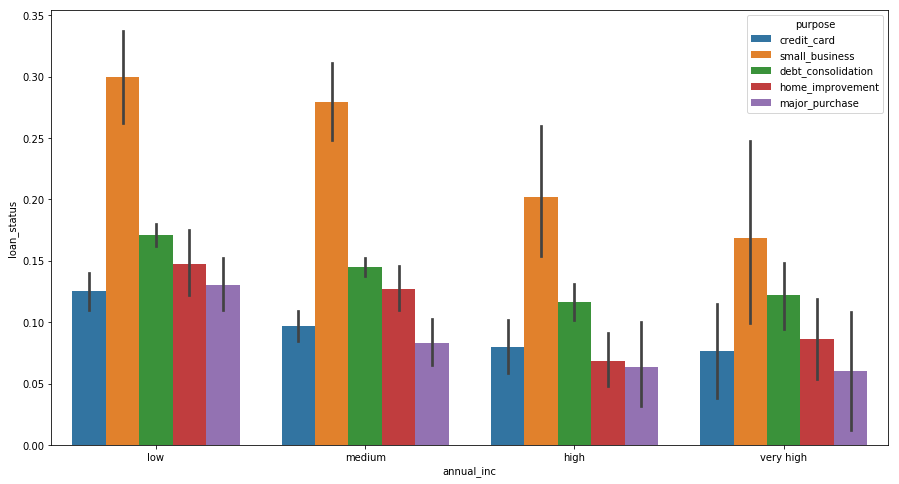

In [74]:
plot_segmented('annual_inc')

Computing default rate across the categories and difference between the highest and the lowest default rate

In [77]:
def diff_rate(variable):
    default_rates = df.groupby(variable).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 3), round(default_rates[0] - default_rates[-1], 3))


In [78]:
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']


/home/safalta/wb/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
# storing the diff of default rates for each column in a dict
diff_dict = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(diff_dict)

{'loan_amnt': 6.5, 'funded_amnt': 5.8999999999999995, 'term': 15.0, 'int_rate': 19.6, 'installment': 3.4000000000000004, 'grade': 27.900000000000002, 'sub_grade': 48.1, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 19.2, 'annual_inc': 6.1, 'verification_status': 4.5, 'issue_d': 26.1, 'pymnt_plan': 0.0, 'purpose': 16.900000000000002, 'dti': 3.8, 'initial_list_status': 0.0}


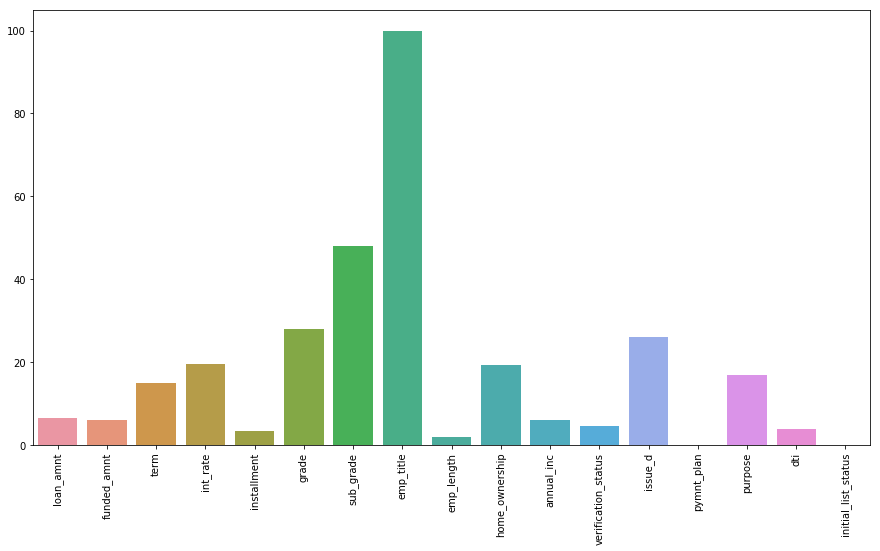

In [96]:
plt.figure(figsize=(15,8))
sns.barplot(x=list(diff_dict.keys()), y=list(diff_dict.values()))
plt.xticks(rotation = 90)
plt.show()
